In [1]:
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
matplotlib.interactive(True)

### Importing data and Data Cleaning

In [2]:
#Importing data
pop_data=pd.read_csv("C:\\Users\\lewis.wachira\\Desktop\\Class\\Project\\DataSets\\health_ken.csv")
pop_data=pd.DataFrame(pop_data)
pop_data.head()

,Country Name,Country ISO3,Year,Indicator Name,Indicator Code,Value
0,#country+name,#country+code,#date+year,#indicator+name,#indicator+code,#indicator+value+num
1,Kenya,KEN,2014,Proportion of women subjected to physical and/...,SG.VAW.1549.ZS,25.5
2,Kenya,KEN,2014,Women who believe a husband is justified in be...,SG.VAW.ARGU.ZS,21
3,Kenya,KEN,2009,Women who believe a husband is justified in be...,SG.VAW.ARGU.ZS,30.9
4,Kenya,KEN,2003,Women who believe a husband is justified in be...,SG.VAW.ARGU.ZS,45.9


In [3]:
#Dropping row index 0 and columns 'Country IS03' and 'Indicator Code' as they have no significance in the dataset
pop_data.drop([0],axis=0, inplace=True)
pop_data.drop(['Country ISO3','Country Name','Indicator Code'],axis=1, inplace=True)
pop_data.head()

,Year,Indicator Name,Value
1,2014,Proportion of women subjected to physical and/...,25.5
2,2014,Women who believe a husband is justified in be...,21
3,2009,Women who believe a husband is justified in be...,30.9
4,2003,Women who believe a husband is justified in be...,45.9
5,2014,Women who believe a husband is justified in be...,7


In [4]:
pop_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9386 entries, 1 to 9386
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Year            9386 non-null   object
 1   Indicator Name  9386 non-null   object
 2   Value           9386 non-null   object
dtypes: object(3)
memory usage: 220.1+ KB


In [5]:
#Converting columns 'Value' and 'Year' to float and integer
pop_data = pop_data.astype({'Value':'float'})
pop_data = pop_data.astype({'Year':'int64'})
pop_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9386 entries, 1 to 9386
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Year            9386 non-null   int64  
 1   Indicator Name  9386 non-null   object 
 2   Value           9386 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 220.1+ KB


In [6]:
#Converting the dataset into a pivot table and reseting the index to default
pop_data=pop_data.pivot(index='Year',columns='Indicator Name', values='Value')
pop_data=pop_data.reset_index()
pop_data.tail()

Indicator Name,Year,Total fertility rate (TFR) (births per woman): Q1 (lowest),Total fertility rate (TFR) (births per woman): Q2,Total fertility rate (TFR) (births per woman): Q3,Total fertility rate (TFR) (births per woman): Q4,Total fertility rate (TFR) (births per woman): Q5 (highest),ARI treatment (% of children under 5 taken to a health provider),Acceptability of media messages on family planning (% of women): Q1 (lowest),Acceptability of media messages on family planning (% of women): Q2,Acceptability of media messages on family planning (% of women): Q3,...,Women who believe a husband is justified in beating his wife (any of five reasons) (%),Women who believe a husband is justified in beating his wife when she argues with him (%),Women who believe a husband is justified in beating his wife when she burns the food (%),Women who believe a husband is justified in beating his wife when she goes out without telling him (%),Women who believe a husband is justified in beating his wife when she neglects the children (%),Women who believe a husband is justified in beating his wife when she refuses sex with him (%),Women who were first married by age 15 (% of women ages 20-24),Women who were first married by age 18 (% of women ages 20-24),Women's share of population ages 15+ living with HIV (%),Young people (ages 15-24) newly infected with HIV
57,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.5,14000.0
58,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63.8,13000.0
59,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.1,12000.0
60,2020,4.4,3.3,3.4,3.5,2.2,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.3,12000.0
61,2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Data Exploration

### Analysis on Population Growth Rate

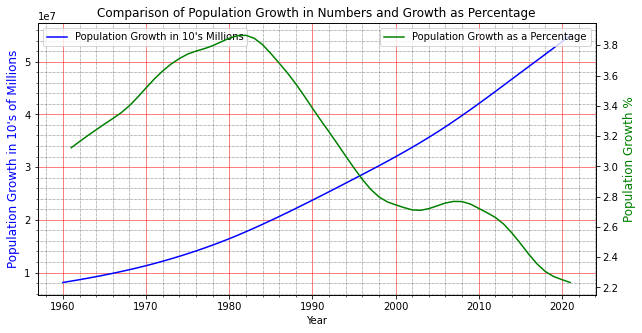

In [7]:
#Plot of population growth(Totals Number) vs Annual Population Growth Rate

fig, ax_pop_growth = plt.subplots()

fig.set_figwidth(10)
fig.set_figheight(5)

plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='red')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

#Plot of population Growth
ax_pop_growth.set_xlabel('Year')

ax_pop_growth.set_ylabel("Population Growth in 10's of Millions",
                         color='blue',
                    size='large')

ax_pop_growth.plot(pop_data['Year'], 
              pop_data['Population, total'],
                  color='blue')
ax_pop_growth.legend(["Population Growth in 10's Millions"])

ax_pop_growth_percentage = ax_pop_growth.twinx()

#Plot of Annual Population Growth Rate
ax_pop_growth_percentage.set_ylabel('Population Growth %',
                                   color='green',
                                   size='large') 

ax_pop_growth_percentage.plot(pop_data['Year'], 
         pop_data['Population growth (annual %)'], 
         color='green')
ax_pop_growth_percentage.legend(['Population Growth as a Percentage'])

plt.title('Comparison of Population Growth in Numbers and Growth as Percentage',
         size='large')

plt.savefig('Pop data',facecolor='white', edgecolor='white')

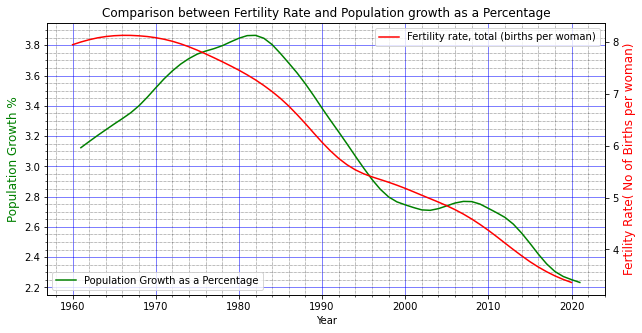

In [8]:
#Plot of Fertility rate vs Annual Population Growth Rate
pop_fertility=pop_data[['Year','Fertility rate, total (births per woman)']]

fig, ax_pop_growth_percentage = plt.subplots()

fig.set_figwidth(10)
fig.set_figheight(5)

plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='blue')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

#Plotting of Annual Growth Rate
ax_pop_growth_percentage.set_xlabel('Year')

ax_pop_growth_percentage.set_ylabel('Population Growth %',
                                   color='green',
                                   size='large') 

ax_pop_growth_percentage.plot(pop_data['Year'], 
         pop_data['Population growth (annual %)'], 
         color='green')

ax_pop_growth_percentage.legend(['Population Growth as a Percentage'], loc='lower left')

ax_pop_fertility = ax_pop_growth_percentage.twinx()

#Plotting of Fertility Rate
ax_pop_fertility.set_ylabel('Fertility Rate( No of Births per woman)',
                                   color='red',
                                   size='large') 

ax_pop_fertility.plot(pop_data['Year'], 
         pop_fertility['Fertility rate, total (births per woman)'], 
         color='red')

ax_pop_fertility.legend(['Fertility rate, total (births per woman)'],loc='upper right')

plt.title('Comparison between Fertility Rate and Population growth as a Percentage', size='large')

plt.savefig('Fertility', facecolor='white', edgecolor='white')

### Age Structure

In [9]:
#Addition of new columns with desired parameters
pop_data['00-04 Yrs Female']=(pop_data['Population ages 00-04, female (% of female population)'])/100*pop_data['Population, female']

pop_data['05-14 Yrs Female']=(pop_data[['Population ages 05-09, female (% of female population)',
                                        'Population ages 10-14, female (% of female population)']]
                       .sum(axis=1))/100*pop_data['Population, female']

pop_data['15-34 Yrs Female']=(pop_data[['Population ages 15-19, female (% of female population)',
                                        'Population ages 20-24, female (% of female population)',
                                        'Population ages 25-29, female (% of female population)',
                                        'Population ages 30-34, female (% of female population)',]]
                       .sum(axis=1))/100*pop_data['Population, female']

pop_data['35-59 Yrs Female']=(pop_data[['Population ages 35-39, female (% of female population)',
                                        'Population ages 40-44, female (% of female population)',
                                        'Population ages 45-49, female (% of female population)',
                                        'Population ages 50-54, female (% of female population)',
                                        'Population ages 55-59, female (% of female population)']]
                       .sum(axis=1))/100*pop_data['Population, female']

pop_data['60 Yrs and Above Female']=(pop_data[['Population ages 60-64, female (% of female population)',
                                             'Population ages 65 and above, female (% of female population)']]
                              .sum(axis=1))/100*pop_data['Population, female']

In [10]:
#Addition of new columns with desired parameters
pop_data['00-04 Yrs male']=(pop_data['Population ages 00-04, male (% of male population)'])/100*pop_data['Population, male']

pop_data['05-14 Yrs male']=(pop_data[['Population ages 05-09, male (% of male population)',
                                      'Population ages 10-14, male (% of male population)']]
                       .sum(axis=1))/100*pop_data['Population, male']

pop_data['15-34 Yrs male']=(pop_data[['Population ages 15-19, male (% of male population)',
                                      'Population ages 20-24, male (% of male population)',
                                      'Population ages 25-29, male (% of male population)',
                                      'Population ages 30-34, male (% of male population)',]]
                       .sum(axis=1))/100*pop_data['Population, male']

pop_data['35-59 Yrs male']=(pop_data[['Population ages 35-39, male (% of male population)',
                                      'Population ages 40-44, male (% of male population)',
                                      'Population ages 45-49, male (% of male population)',
                                      'Population ages 50-54, male (% of male population)',
                                      'Population ages 55-59, male (% of male population)']]
                       .sum(axis=1))/100*pop_data['Population, male']

pop_data['60 Yrs and Above male']=(pop_data[['Population ages 60-64, male (% of male population)',
                                             'Population ages 65 and above, male (% of male population)']]
                              .sum(axis=1))/100*pop_data['Population, male']

In [11]:
#Creation of a new dataset
pop_data['00-04 Yrs']=pop_data[['00-04 Yrs male', '00-04 Yrs Female']].sum(axis=1)
pop_data['05-14 Yrs']=pop_data[['05-14 Yrs male', '05-14 Yrs Female']].sum(axis=1)
pop_data['15-34 Yrs']=pop_data[['15-34 Yrs male', '15-34 Yrs Female']].sum(axis=1)
pop_data['35-59 Yrs']=pop_data[['35-59 Yrs male', '35-59 Yrs Female']].sum(axis=1)
pop_data['60 Yrs and Above']=pop_data[['60 Yrs and Above male', '60 Yrs and Above Female']].sum(axis=1)

pop_agegroup=pop_data[['Year','00-04 Yrs','05-14 Yrs','15-34 Yrs','35-59 Yrs','60 Yrs and Above']]
pop_agegroup.head()

Indicator Name,Year,00-04 Yrs,05-14 Yrs,15-34 Yrs,35-59 Yrs,60 Yrs and Above
0,1960,1.602398e+06,2.173515e+06,2.345551e+06,1.514818e+06,483799.999967
1,1961,1.655112e+06,2.289726e+06,2.397309e+06,1.540465e+06,495081.000001
2,1962,1.711808e+06,2.401953e+06,2.458840e+06,1.568505e+06,505896.000032
3,1963,1.772645e+06,2.509444e+06,2.530392e+06,1.599511e+06,516517.999970
4,1964,1.836725e+06,2.612743e+06,2.611752e+06,1.634282e+06,527190.000000


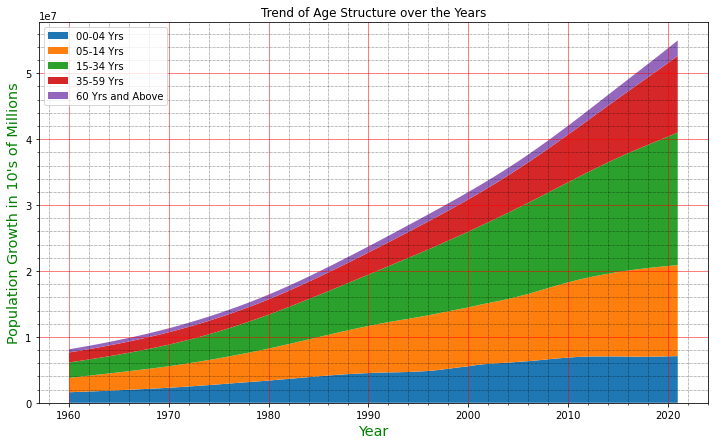

In [12]:
#Plotting of a age structure graph representing the various age groups

#Stacking the variables
x = pop_agegroup['Year']

y = np.vstack([pop_agegroup['00-04 Yrs'], 
               pop_agegroup['05-14 Yrs'], 
               pop_agegroup['15-34 Yrs'],
              pop_agegroup['35-59 Yrs'],
              pop_agegroup['60 Yrs and Above']])

labels = ['00-04 Yrs','05-14 Yrs','15-34 Yrs','35-59 Yrs','60 Yrs and Above']

#Plotting the stack graph
fig, ax = plt.subplots(figsize=(12,7))

plt.minorticks_on()
plt.grid(which='major', linestyle='-', linewidth='0.5', color='red')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

ax.set_xlabel('Year', size='x-large', color='green')
ax.set_ylabel("Population Growth in 10's of Millions", size= 'x-large', color='green')

ax.stackplot(x, y, labels=labels)

ax.legend(loc='upper left')

plt.title('Trend of Age Structure over the Years')

plt.savefig('Age Structure', facecolor='white', edgecolor='white')

In [13]:
pop_agegroup_pie=pop_agegroup.iloc[-1:,1:7].T.astype('int64')
pop_agegroup_pie=pop_agegroup_pie.reset_index()
pop_agegroup_pie

,Indicator Name,61
0,00-04 Yrs,7084621
1,05-14 Yrs,13802613
2,15-34 Yrs,20120506
3,35-59 Yrs,11624697
4,60 Yrs and Above,2353264


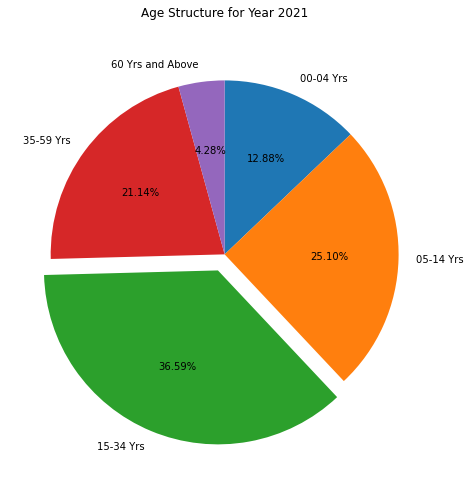

In [14]:
#Ploting a pie chart for age group for 2021
fig1, ax = plt.subplots(figsize=(10, 8))

ax.pie(pop_agegroup_pie[61], 
        labels=pop_agegroup_pie['Indicator Name'], 
        autopct='%.2f%%',
        startangle=90,
        counterclock=False,
      explode=(0,0,0.1,0,0))

plt.title('Age Structure for Year 2021', size='large', pad=20)

plt.savefig('Pie Chart', facecolor='white', edgecolor='white')